# Project: TMDb MOVIE DATA ANALYSIS

## Table of Contents
<ul>
<li><a href="#intro">Introduction</a></li>
<li><a href="#wrangling">Data Wrangling</a></li>
<li><a href="#eda">Exploratory Data Analysis</a></li>
<li><a href="#conclusions">Conclusions</a></li>
<li><a href="#limitations">Limitations</a></li>
</ul>

<a id='intro'></a>
## Introduction

The TMDB movies dataset is a dataset with over 10,000 movies extracted from "kaggle". The dataset contains movies from 1960 to 2015. First and foremost the dataset is going to be cleaned to be useful for the following analysis, we will drop the unneeded columns to get our hands dirty with more clean data. After preparing the dataset, the dataset will be analysed  based on the following questions:
   1. How does the duration or Runtime of a movie affect it's average vote?
   2. Which year of the last decade had the highest Vote Count?

In [321]:
# Importing libraries
import pandas as pd
import numpy as py
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline 

<a id='wrangling'></a>
## Data Wrangling




### General Properties

In [322]:
# Load data using pandas' (read_csv) function 
df = pd.read_csv('tmdb-movies.csv')

In [323]:
# Function for printing dataframe head
def print_head(number):
    return df.head(number);

In [324]:
# printing out few lines of the dataset
print_head(5)

,id,imdb_id,popularity,budget,revenue,original_title,cast,homepage,director,tagline,...,overview,runtime,genres,production_companies,release_date,vote_count,vote_average,release_year,budget_adj,revenue_adj
0,135397,tt0369610,32.985763,150000000,1513528810,Jurassic World,Chris Pratt|Bryce Dallas Howard|Irrfan Khan|Vi...,http://www.jurassicworld.com/,Colin Trevorrow,The park is open.,...,Twenty-two years after the events of Jurassic ...,124,Action|Adventure|Science Fiction|Thriller,Universal Studios|Amblin Entertainment|Legenda...,6/9/15,5562,6.5,2015,1.379999e+08,1.392446e+09
1,76341,tt1392190,28.419936,150000000,378436354,Mad Max: Fury Road,Tom Hardy|Charlize Theron|Hugh Keays-Byrne|Nic...,http://www.madmaxmovie.com/,George Miller,What a Lovely Day.,...,An apocalyptic story set in the furthest reach...,120,Action|Adventure|Science Fiction|Thriller,Village Roadshow Pictures|Kennedy Miller Produ...,5/13/15,6185,7.1,2015,1.379999e+08,3.481613e+08
2,262500,tt2908446,13.112507,110000000,295238201,Insurgent,Shailene Woodley|Theo James|Kate Winslet|Ansel...,http://www.thedivergentseries.movie/#insurgent,Robert Schwentke,One Choice Can Destroy You,...,Beatrice Prior must confront her inner demons ...,119,Adventure|Science Fiction|Thriller,Summit Entertainment|Mandeville Films|Red Wago...,3/18/15,2480,6.3,2015,1.012000e+08,2.716190e+08
3,140607,tt2488496,11.173104,200000000,2068178225,Star Wars: The Force Awakens,Harrison Ford|Mark Hamill|Carrie Fisher|Adam D...,http://www.starwars.com/films/star-wars-episod...,J.J. Abrams,Every generation has a story.,...,Thirty years after defeating the Galactic Empi...,136,Action|Adventure|Science Fiction|Fantasy,Lucasfilm|Truenorth Productions|Bad Robot,12/15/15,5292,7.5,2015,1.839999e+08,1.902723e+09
4,168259,tt2820852,9.335014,190000000,1506249360,Furious 7,Vin Diesel|Paul Walker|Jason Statham|Michelle ...,http://www.furious7.com/,James Wan,Vengeance Hits Home,...,Deckard Shaw seeks revenge against Dominic Tor...,137,Action|Crime|Thriller,Universal Pictures|Original Film|Media Rights ...,4/1/15,2947,7.3,2015,1.747999e+08,1.385749e+09


In [325]:
# Data types
df.dtypes

id                        int64
imdb_id                  object
popularity              float64
budget                    int64
revenue                   int64
original_title           object
cast                     object
homepage                 object
director                 object
tagline                  object
keywords                 object
overview                 object
runtime                   int64
genres                   object
production_companies     object
release_date             object
vote_count                int64
vote_average            float64
release_year              int64
budget_adj              float64
revenue_adj             float64
dtype: object

In [326]:
# number of columns and rows 
df.shape

(10866, 21)

> This dataset consists of 10866 rows and 21 columns

In [327]:
# sumary statistics
df.describe()

,id,popularity,budget,revenue,runtime,vote_count,vote_average,release_year,budget_adj,revenue_adj
count,10866.000000,10866.000000,1.086600e+04,1.086600e+04,10866.000000,10866.000000,10866.000000,10866.000000,1.086600e+04,1.086600e+04
mean,66064.177434,0.646441,1.462570e+07,3.982332e+07,102.070863,217.389748,5.974922,2001.322658,1.755104e+07,5.136436e+07
std,92130.136561,1.000185,3.091321e+07,1.170035e+08,31.381405,575.619058,0.935142,12.812941,3.430616e+07,1.446325e+08
min,5.000000,0.000065,0.000000e+00,0.000000e+00,0.000000,10.000000,1.500000,1960.000000,0.000000e+00,0.000000e+00
25%,10596.250000,0.207583,0.000000e+00,0.000000e+00,90.000000,17.000000,5.400000,1995.000000,0.000000e+00,0.000000e+00
50%,20669.000000,0.383856,0.000000e+00,0.000000e+00,99.000000,38.000000,6.000000,2006.000000,0.000000e+00,0.000000e+00
75%,75610.000000,0.713817,1.500000e+07,2.400000e+07,111.000000,145.750000,6.600000,2011.000000,2.085325e+07,3.369710e+07
max,417859.000000,32.985763,4.250000e+08,2.781506e+09,900.000000,9767.000000,9.200000,2015.000000,4.250000e+08,2.827124e+09


> From the sumary statistics above I understand the we have an average of vote count of 543.15 and average rum time to be 109.35 minutes. We can see our data states from the year 1960 to 2015. 

In [328]:
# Inspect data for errors or missing inputs 
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10866 entries, 0 to 10865
Data columns (total 21 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   id                    10866 non-null  int64  
 1   imdb_id               10856 non-null  object 
 2   popularity            10866 non-null  float64
 3   budget                10866 non-null  int64  
 4   revenue               10866 non-null  int64  
 5   original_title        10866 non-null  object 
 6   cast                  10790 non-null  object 
 7   homepage              2936 non-null   object 
 8   director              10822 non-null  object 
 9   tagline               8042 non-null   object 
 10  keywords              9373 non-null   object 
 11  overview              10862 non-null  object 
 12  runtime               10866 non-null  int64  
 13  genres                10843 non-null  object 
 14  production_companies  9836 non-null   object 
 15  release_date       

In [329]:
df.isnull().sum()

id                         0
imdb_id                   10
popularity                 0
budget                     0
revenue                    0
original_title             0
cast                      76
homepage                7930
director                  44
tagline                 2824
keywords                1493
overview                   4
runtime                    0
genres                    23
production_companies    1030
release_date               0
vote_count                 0
vote_average               0
release_year               0
budget_adj                 0
revenue_adj                0
dtype: int64

> This dataset consists of different data types with a sum of 13,434 null values which will be dropped from the dataset. Wrong inputs such as zero budget and revenue will also be droped from the data set. Another thing to keep in mind is that there are some columns that we don't need in our analysis and whose presence or absence has no bearing on our calculations, such as ['tagline', 'keywords', 'overview', 'homepage'] will also be droped from the dataset.

### Data Cleaning

In [330]:
# droping unneeded columns
df.drop(['tagline', 'keywords', 'overview', 'homepage'], axis=1, inplace=True)
# confirm changes
print_head(1)

,id,imdb_id,popularity,budget,revenue,original_title,cast,director,runtime,genres,production_companies,release_date,vote_count,vote_average,release_year,budget_adj,revenue_adj
0,135397,tt0369610,32.985763,150000000,1513528810,Jurassic World,Chris Pratt|Bryce Dallas Howard|Irrfan Khan|Vi...,Colin Trevorrow,124,Action|Adventure|Science Fiction|Thriller,Universal Studios|Amblin Entertainment|Legenda...,6/9/15,5562,6.5,2015,1.379999e+08,1.392446e+09


> Unwanted columns stated that will be droped was performed in the above cell and printed the first one row to confirm changes

In [331]:
# Shape of the dataset after column reduction
df.shape

(10866, 17)

> After checking the shape of the dataset, we have our columns now reduced from 21 to 17.

In [332]:
# Droping null values from dataset 
df.dropna(inplace=True)

> And also null values was droped from dataset for the purposes of making the dataset more cleaner

In [333]:
# confirming update
df.isnull().sum()

id                      0
imdb_id                 0
popularity              0
budget                  0
revenue                 0
original_title          0
cast                    0
director                0
runtime                 0
genres                  0
production_companies    0
release_date            0
vote_count              0
vote_average            0
release_year            0
budget_adj              0
revenue_adj             0
dtype: int64

> Confirmation of updated droped null values, We can now see we have zero null values in the dataset.

In [334]:
# droping rows with budget equal to zero
df.drop(df.query('budget == 0').index, inplace=True)

> As explained earlier, budget cells with 0 values will also be droped. The above cell takes care of that.

In [335]:
# droping rows with revenue equal to zero
df.drop(df.query('revenue == 0').index, inplace=True)

> With revenue same operations done in the previous cell was done here to remove zero revenue data.

In [336]:
# checking size of data set to confirm
df.shape

(3806, 17)

> After droping uneeded data, out initial dataset rows of 10866 has droped to 3806 with all data being intact. 

In [337]:
# searching for duplicates and drop them
sum(df.duplicated())

1

> We searched for duplicates and resulted in 1

In [338]:
# Droping Duplicated data
df.drop_duplicates(inplace=True)

> The above cell droped duplicated data.

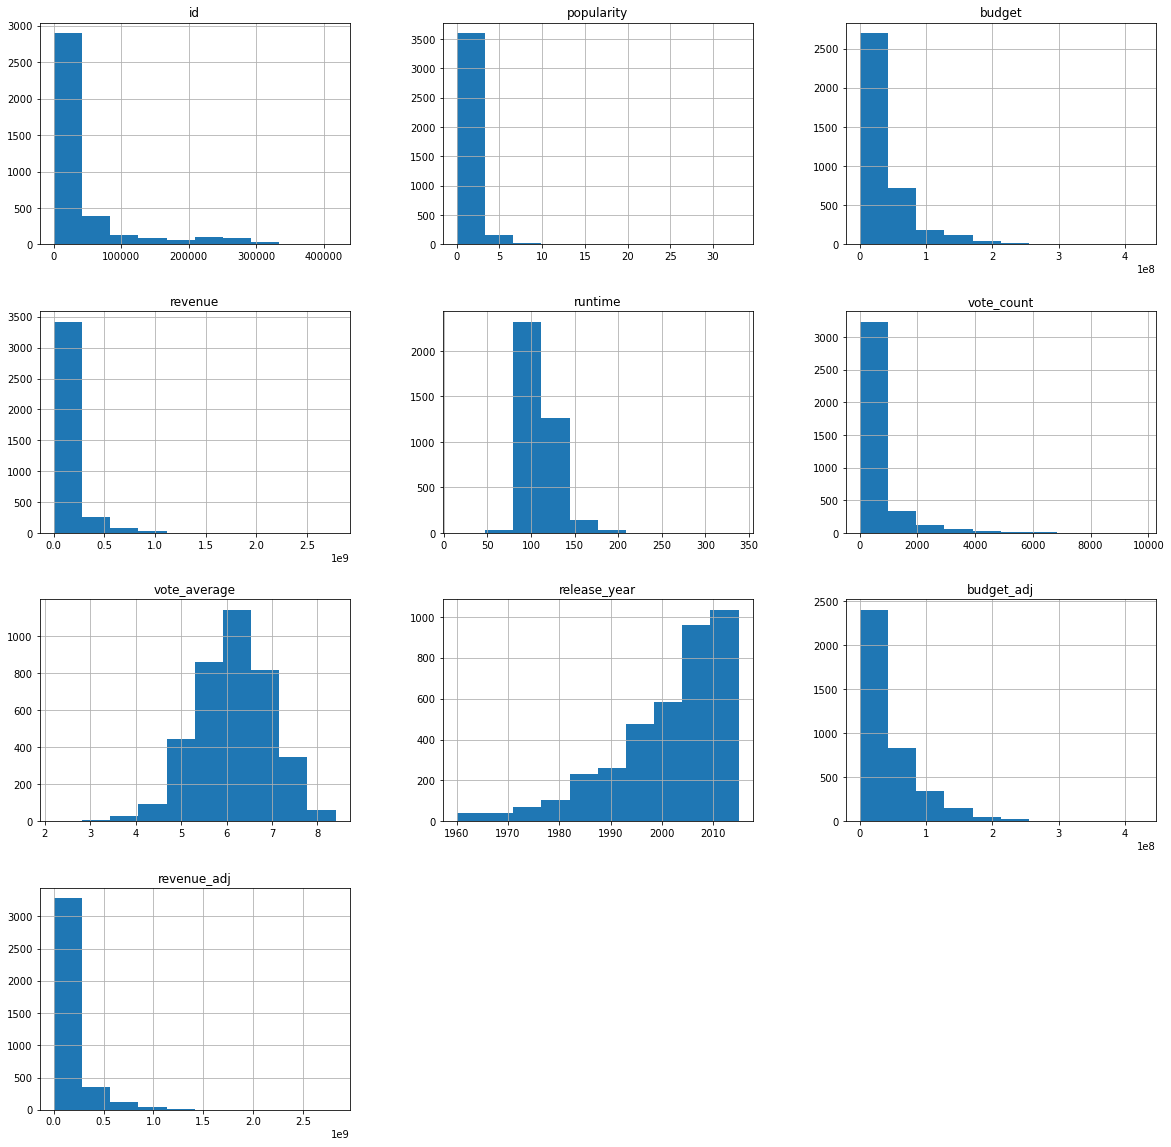

In [339]:
# Histogram of the entire dataframe
df.hist(figsize=(20, 20));

> The figures above shows the histogram of our various attributes. We have most of our data skewed to the right except for 'vote_average' which as its mean less than the median making it a letf skewed.

In [340]:
# Dataframe Info
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 3805 entries, 0 to 10848
Data columns (total 17 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   id                    3805 non-null   int64  
 1   imdb_id               3805 non-null   object 
 2   popularity            3805 non-null   float64
 3   budget                3805 non-null   int64  
 4   revenue               3805 non-null   int64  
 5   original_title        3805 non-null   object 
 6   cast                  3805 non-null   object 
 7   director              3805 non-null   object 
 8   runtime               3805 non-null   int64  
 9   genres                3805 non-null   object 
 10  production_companies  3805 non-null   object 
 11  release_date          3805 non-null   object 
 12  vote_count            3805 non-null   int64  
 13  vote_average          3805 non-null   float64
 14  release_year          3805 non-null   int64  
 15  budget_adj          

> We have cleaned our dataset now!.

<a id='eda'></a>
## Exploratory Data Analysis




### Research Question 1: How does the duration or Runtime of a movie affect it's average vote?

In [341]:
# adding an additional column to dataframe to group runtimes between time frames in hours
df['runtime_bins'] = pd.cut(df['runtime'], bins=6, labels=('1hr', '2hrs', '3hrs', '4hrs', '5hrs', '6hrs'))
print_head(5)

,id,imdb_id,popularity,budget,revenue,original_title,cast,director,runtime,genres,production_companies,release_date,vote_count,vote_average,release_year,budget_adj,revenue_adj,runtime_bins
0,135397,tt0369610,32.985763,150000000,1513528810,Jurassic World,Chris Pratt|Bryce Dallas Howard|Irrfan Khan|Vi...,Colin Trevorrow,124,Action|Adventure|Science Fiction|Thriller,Universal Studios|Amblin Entertainment|Legenda...,6/9/15,5562,6.5,2015,1.379999e+08,1.392446e+09,3hrs
1,76341,tt1392190,28.419936,150000000,378436354,Mad Max: Fury Road,Tom Hardy|Charlize Theron|Hugh Keays-Byrne|Nic...,George Miller,120,Action|Adventure|Science Fiction|Thriller,Village Roadshow Pictures|Kennedy Miller Produ...,5/13/15,6185,7.1,2015,1.379999e+08,3.481613e+08,2hrs
2,262500,tt2908446,13.112507,110000000,295238201,Insurgent,Shailene Woodley|Theo James|Kate Winslet|Ansel...,Robert Schwentke,119,Adventure|Science Fiction|Thriller,Summit Entertainment|Mandeville Films|Red Wago...,3/18/15,2480,6.3,2015,1.012000e+08,2.716190e+08,2hrs
3,140607,tt2488496,11.173104,200000000,2068178225,Star Wars: The Force Awakens,Harrison Ford|Mark Hamill|Carrie Fisher|Adam D...,J.J. Abrams,136,Action|Adventure|Science Fiction|Fantasy,Lucasfilm|Truenorth Productions|Bad Robot,12/15/15,5292,7.5,2015,1.839999e+08,1.902723e+09,3hrs
4,168259,tt2820852,9.335014,190000000,1506249360,Furious 7,Vin Diesel|Paul Walker|Jason Statham|Michelle ...,James Wan,137,Action|Crime|Thriller,Universal Pictures|Original Film|Media Rights ...,4/1/15,2947,7.3,2015,1.747999e+08,1.385749e+09,3hrs


> Grouped our Runtime to ranges of hours form 1 to 6 hours to aid in visualization. 

In [342]:
# extracting runtime_bins and vote_average
df_hrs = df[['runtime_bins' ,'vote_average']]
df_hrs.head()

,runtime_bins,vote_average
0,3hrs,6.5
1,2hrs,7.1
2,2hrs,6.3
3,3hrs,7.5
4,3hrs,7.3


In [343]:
# sumary statistics
df_hrs.describe()

,vote_average
count,3805.000000
mean,6.170565
std,0.792437
min,2.200000
25%,5.700000
50%,6.200000
75%,6.700000
max,8.400000


> 

In [344]:
# Grouping by runtime_bins
visual = df_hrs.groupby(['runtime_bins'],as_index=False).mean()
visual

,runtime_bins,vote_average
0,1hr,6.550000
1,2hrs,6.047660
2,3hrs,6.618558
3,4hrs,7.064865
4,5hrs,6.300000
5,6hrs,6.200000


In [345]:
# Function for bar chart analysis
def bar_chart(data_frame, x, y, xlabel, ylabel, title):
    """
    This function takes the data frame name, the column name, the xlabel, ylabel and the title and returns a bar chart.
    """
    cols = [x, y]
    df_plt = data_frame.sort_values(y, ascending=False)[cols].set_index(x)
    sns.barplot(data=df_plt, x=df_plt.index, y=y);
    plt.xticks(ha='left'); plt.yticks(fontsize=15);
    plt.xlabel(xlabel, fontsize=15)
    plt.ylabel(ylabel, fontsize=15)
    plt.title(title, fontsize=15);

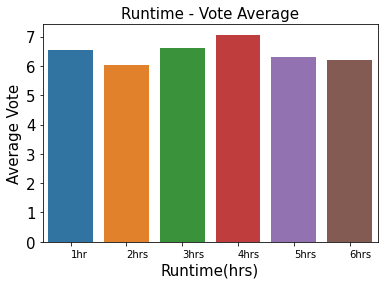

In [346]:
bar_chart(visual, 'runtime_bins', 'vote_average', 'Runtime(hrs)', 'Average Vote','Runtime - Vote Average')

> The Graph above show a graphical representation of "Vote Average aganinst Runtimes" using Bar Plot. From the chart we can see on the average movies with a runtime of 4 hours gets the most average vote count over the years.

### Research Question 2: Which year of the last decade had the highest Vote Count?

In [347]:
# extracting 'release_year' and 'vote_count' dataset and printing dataset
df_decade = df[['release_year', 'vote_count']]
df_decade.head()

,release_year,vote_count
0,2015,5562
1,2015,6185
2,2015,2480
3,2015,5292
4,2015,2947


In [348]:
# checking the shape of the data extracted
df_decade.shape

(3805, 2)

In [349]:
# Selecting data for the last decade and printing results
df_decade = df_decade.query('release_year > 2005')
df_decade.head()

,release_year,vote_count
0,2015,5562
1,2015,6185
2,2015,2480
3,2015,5292
4,2015,2947


> Here we queried our data to extract data from the year 2006 to 2015

In [350]:
# Grouping of release_year 
df_decade = df_decade.groupby(['release_year'], as_index=False).sum()
df_decade

,release_year,vote_count
0,2006,65266
1,2007,76528
2,2008,87592
3,2009,103154
4,2010,115436
5,2011,121103
6,2012,160618
7,2013,182589
8,2014,169922
9,2015,155369


> We grouped the data into based on the year it was released

In [351]:
# confirming we have 10 columns in the new dataset
df_decade.shape

(10, 2)

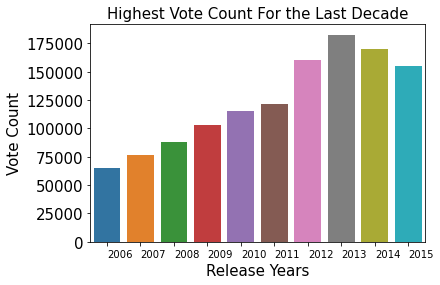

In [352]:
# Plotting of dataset
bar_chart(df_decade, 'release_year', 'vote_count', 'Release Years', 'Vote Count','Highest Vote Count For the Last Decade')

> The year 2013 had the most vote count followed by 2014 and 2012. This shows over the last decade, 2012 to 2014 had the highest vote count.

<a id='conclusions'></a>
## Conclusions

> Our statistical analysis concluded that runtime sometimes affect the vote count of a movie. In our analysis we go to see that movies with runtime between 181 to 240 minutes tend to get more vote count on the average with an average vote count of 7.06 minutes, followed by movies with a runtime between 121 to 180 minutes also with an average vote count of 6.61 minutes.

> Again, we estimated the number of vote count over the last decade and our research showed that years with the most vote count is between the years of 2012 to 2015, with the with 2013 topping the chart with 182589. Followed by 2014 with 169922 and 2012 with 160618 votes.

<a id='limitations'></a>
## Limitations

> One of the main problem I had with the analysis was the number of null values present in the dataset. These null values was removed with it's columns from the dataset which which resulted we losing more than half of the dataset will will surely have effect on the distributions and the analysis.